In [20]:
import numpy as np

In [21]:
import warnings
warnings.simplefilter('ignore')

In [22]:
import progressbar

In [23]:
import pandas as pd
from pandas import DataFrame

In [24]:
import sklearn as sk
import sklearn.datasets as db
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score 

In [26]:
import scikitplot as skplt

In [27]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [28]:
from easyesn import ClassificationESN
from easyesn import OneHotEncoder
from easyesn.optimizers import GridSearchOptimizer

In [29]:
import xgboost

In [30]:
np.random.seed(4)

In [12]:
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cor=0
        for i in range(len(cm)):
            cor+=cm[i,i]
        print("Normalized confusion matrix ",cor)
    else:
        cor=0
        for i in range(len(cm)):
            cor+=cm[i,i]
        print('Confusion matrix, without normalization ',cor)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [13]:
import os
folderName = "C:/Users/i5/Google Диск/ПМИ/курсы/курсовая работа/project proposal/main+pics/TheReservoirComputingBasicModelandSoftwareImplementationoftheNeuralNetworkESN/pics"

## I. ИССЛЕДОВАНИЕ АРХИТЕКТУРЫ ESN

<b>Генерирование набора данных ( т.е. двух экспериментально выбранных сигналов: $\hspace{0.3cm}f(t)=-3^{t}\hspace{0.3cm}$ и $ \hspace{0.3cm}f(t)=2^{t} $  )

In [14]:
n_data = 2                                  
n_features = 15                             
t=np.linspace(-10,10,n_features)
inputData = np.empty((n_data, n_features))
inputData[0,:]=np.array(-3**t)
inputData[1,:]=np.array(2**t)
outputData=np.array(([0,1],[1,0]))

In [15]:
showData=DataFrame(np.hstack((inputData,np.array([outputData[:,0]]).T)))
names=[]
for i in range(n_features):
    names.append('feature'+str(i+1))
names.append("class")
showData.columns=names
showData.rename(index={0:'Signal1',1:'signal2'}, inplace=True)
showData.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,class
Signal1,-0.000017,-0.000081,-0.000391,-0.001878,-0.009020,-0.043331,-0.208160,-1.0,-4.803987,-23.078288,-110.867787,-532.607368,-2558.638688,-12291.666114,-59049.0,0.0
signal2,0.000977,0.002629,0.007076,0.019047,0.051271,0.138011,0.371499,1.0,2.691800,7.245789,19.504218,52.501463,141.323458,380.414538,1024.0,1.0


<b> Создание объекта эхо-сети с резервуаром, состоящем из трех нейронов. Соответственно, в предложенном случае эхо-сеть является трехмерной динамической системой.

 Используем  __ClassificationESN__ из библиотеки __[easyesn](https://github.com/kalekiu/easyesn)__ для задачи бинарной классификации 

In [16]:
classESN= ClassificationESN(1,3, 2,reservoirDensity=0.3) #n_input=1, n_reservoir=3, n_classes=2

<b> Связи нейронов в резервуаре( матрица _W) 

In [0]:
print('The random reservoir of the ESN object \n')
print(classESN._W)

The random reservoir of the ESN object 

[[ 1.          0.          0.        ]
 [ 0.         -0.40873146  0.94765088]
 [ 0.         -0.82186733  0.        ]]


### Обучение объекта ESN 

In [0]:
training_error=classESN.fit(inputData, outputData, verbose=0)
print('training_error',training_error)

training_error 1.06880030559


#### Вектор реакции объекта ESN на сигнал inputData

In [0]:
print(classESN._X.shape)
print(classESN._X)

(5, 30)
[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [ -1.69350878e-05  -8.13559359e-05  -3.90832830e-04  -1.87755570e-03
   -9.01975254e-03  -4.33307708e-02  -2.08160445e-01  -1.00000000e+00
   -4.80398666e+00  -2.30782878e+01  -1.10867787e+02  -5.32607368e+02
   -2.55863869e+03  -1.22916661e+04  -5.90490000e+04   9.76562500e-04
    2.62871131e-03   7.07596613e-03   1.90470883e-02   5.12709598e-02
    1.38011189e-01   3.71498572e-01   1.00000000e+00   2.69180039e+00
    7.24578931e+00   1.95042185e+01   5.25014

####  W_out - матрица считыватель( readout), которая формируется во время обучения объекта сети. Также W_out позволяет постороить плоскоть в трехмерном пространстве, с помощью которой, можно будет классифицировать сигналы.

In [0]:
print(classESN._W_out.shape)

(2, 5)


#### Нормали разделющих плоскостей

In [0]:
normal1=np.array(([0,0,0],[classESN._W_out[0,2],classESN._W_out[0,3],classESN._W_out[0,4]])) #нормаль к первой плоскости     
normal1=normal1/np.sqrt(normal1[1,0]**2+normal1[1,1]**2+normal1[1,2]**2)
normal1=normal1.T
print("The first normal\n", normal1)

normal2=np.array(([0,0,0],[classESN._W_out[1,2],classESN._W_out[1,3],classESN._W_out[1,4]])) #нормаль к второй плоскоти 
normal2=normal2/np.sqrt(normal2[1,0]**2+normal2[1,1]**2+normal2[1,2]**2)
normal2=normal2.T
print("The second normal\n", normal2)

The first normal
 [[ 0.          0.0207806 ]
 [ 0.          0.31734672]
 [ 0.         -0.94808187]]
The second normal
 [[ 0.         -0.0207806 ]
 [ 0.         -0.31734672]
 [ 0.          0.94808187]]


<IPython.core.display.Javascript object>


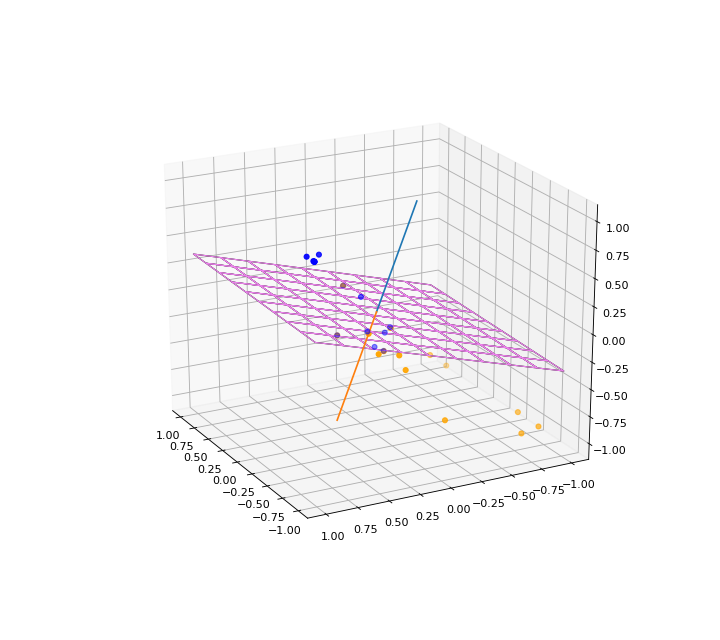

In [0]:
%matplotlib notebook

fig = plt.figure(figsize=(9,8),dpi=80)
ax = fig.gca(projection='3d')
for i in range(n_data):
    if(outputData[i,0]==0):
        ax.scatter3D(classESN._X[2][(i*n_features):((i+1)*n_features)], classESN._X[3][(i*n_features):((i+1)*n_features)], classESN._X[4][(i*n_features):((i+1)*n_features)],color="blue")
    else:
        ax.scatter3D(classESN._X[2][i*n_features:(i+1)*n_features], classESN._X[3][i*n_features:(i+1)*n_features], classESN._X[4][i*n_features:(i+1)*n_features],color="orange")
xx, yy = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
zz1=(-classESN._W_out[0,2]*xx - classESN._W_out[0,3]*yy)/classESN._W_out[0,4] 
zz2=(-classESN._W_out[1,2]*xx - classESN._W_out[1,3]*yy)/classESN._W_out[1,4] 
ax.plot_surface(xx,yy,zz1,color='none',edgecolors='black' ) 
ax.plot_surface(xx,yy,zz2,color='none',edgecolors='violet' ) 
ax.plot(normal2[:][0],normal2[:][1],normal2[:][2])
ax.plot(normal1[:][0],normal1[:][1],normal1[:][2]) 
plt.show()


## II. ИССЛЕДОВАНИЕ ЗАВИСИМОСТИ БИНАРНОГО КЛАССИФИКАТОРА НА ESN  ОТ СПОСОБА ТЕМПОРАЛИЗАЦИИ ДАННЫХ


Генерирование синтезированного набора данных, используя __sklearn.datasets.make_classification()__

In [286]:
n_features=12
n_samples=4000
n_train=round(0.65*n_samples)
n_classes=2
inputData,output=db.make_classification(n_samples=n_samples, n_features=n_features, n_informative=8, n_repeated=2,
                                            n_classes=n_classes, n_clusters_per_class=2)

In [287]:
ohe=OneHotEncoder()
outputData=ohe.fit_transform(output)

In [288]:
showData=DataFrame(inputData)
names=[]
for i in range(n_features):
    names.append('f'+str(i+1))
showData.columns=names
for i in range(5):
    if(outputData[i,0]==0):
        showData.rename(index={i:'class1'}, inplace=True)
    else:
        showData.rename(index={i:'class2'}, inplace=True)
showData.columns=names
showData.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
class2,2.060450,1.288701,-0.191513,-0.612764,-3.018084,-4.001883,2.704782,1.123264,2.060450,2.435107,-0.612764,-0.458798
class2,-2.454027,-1.866458,-3.782672,0.856856,2.948287,0.093940,-4.537209,-0.518245,-2.454027,-1.838384,0.856856,1.386920
class1,-1.001813,2.001352,0.216937,2.411756,1.600756,3.586033,0.932195,-2.786727,-1.001813,-1.243076,2.411756,0.382135
class1,1.730910,0.963911,0.943450,-1.280904,-0.191963,-1.130778,-0.305587,-1.008564,1.730910,-2.089250,-1.280904,1.017820
class1,2.143875,-0.555302,0.903697,1.141180,2.059046,2.920095,0.562807,-4.362668,2.143875,1.194853,1.141180,3.179556


0    1287
1    1313
dtype: int64


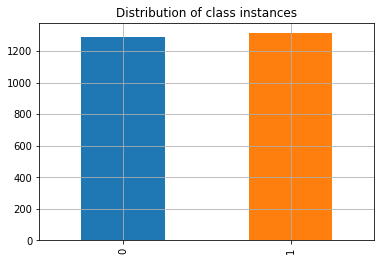

In [289]:
%matplotlib inline
frame=DataFrame(outputData[:n_train])
print(frame[lambda x: x==1].count())
frame[lambda x: x==1].count().plot.bar()
plt.title("Distribution of class instances")
plt.grid()
plt.savefig(os.path.join(folderName, 'distribution.png'), format='png', dpi=200)
plt.show()

In [290]:
label=np.array(range(n_classes))
h=OneHotEncoder()
label=h.fit_transform(label)

<b> Проведем классификацию на полученных данных с помощью решающих деревьев

используем __xgboost.XGBClassifier() __

In [291]:
model = xgboost.XGBClassifier()
model.fit(inputData[:n_train],output[:n_train])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [292]:
predicted_xgb = model.predict(inputData[n_train:])

In [293]:
cnf_xgb=confusion_matrix(output[n_train:],predicted_xgb)#confusion matrix
acc_xg_synth=accuracy_score(output[n_train:],predicted_xgb)#accurasy score
f1_xg_synth=f1_score(output[n_train:],predicted_xgb)
print(acc_xg_synth)
print(f1_xg_synth)

0.889285714286
0.887108521486


Confusion matrix, without normalization  1245


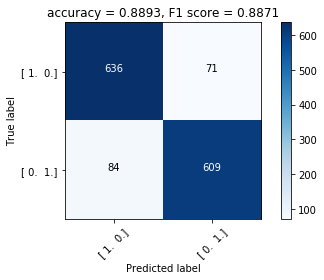

In [294]:
plt.figure()
plot_confusion_matrix(cnf_xgb, classes=label,title='accuracy = '+str(round(acc_xg_synth,4))+
                                                ', F1 score = ' + str(round(f1_xg_synth,4)))
plt.savefig(os.path.join(folderName, 'xgcnfSynth.png'), dpi=200)
plt.show()

#### Исследуем важность признаков с помощь xgboost.plot_importance

В качестве критерия важности используем __weight__ т.е. кол-во раз, когда признак используется для разделения ветвей дерева 


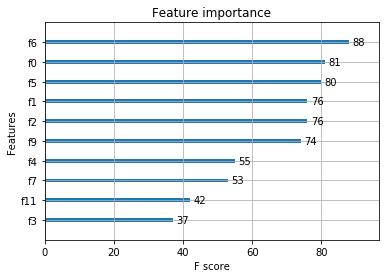

In [295]:
model.importance_type="weight"
xgboost.plot_importance(model,importance_type='weight',max_num_features=14)
plt.savefig('importance.png', format='png', dpi=200)
plt.show()

<b>Получим список признаков, отсортированный по важности ( importance_type=weight)<b/>

In [296]:
featlist=model.feature_importances_.argsort()
print(featlist)

[ 8 10  3 11  7  4  9  1  2  5  0  6]


### Модель бинарного классификатора на ESN

Создадим объект __ClassificationESN__ с резервуаром размерности 300

In [297]:
cls=ClassificationESN(1,400, n_classes)

In [298]:
cls.fit(inputData[:n_train],outputData[:n_train])

0.63809834285217915

In [299]:
predicted_esn=cls.predict(inputData[n_train:])

In [300]:
confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(predicted_esn,axis=1))

array([[646,  61],
       [102, 591]], dtype=int64)

In [301]:
accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(predicted_esn,axis=1))

0.88357142857142856

In [302]:
f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(predicted_esn,axis=1))

0.87881040892193296

С помощью __GridSearchOptimizer__ получим наиболее подходящие настройки параметров для объекта ClassificationESN

In [0]:
_parametersDictionary={'leakingRate':np.linspace(0.5,0.9,15),
                       'reservoirDensity':np.linspace(0.1,0.5,5)
                      }
_fixedParametersDictionary={'n_input':1, 'n_reservoir':400, 'n_classes':2}

In [0]:
opt=GridSearchOptimizer(type(cls), parametersDictionary=_parametersDictionary,
                        fixedParametersDictionary=_fixedParametersDictionary)

In [29]:
opt.fit(inputData[:n_train],outputData[:n_train],inputData[n_train:],outputData[n_train:],transientTime=0)

100% (75 of 75) |#########| Elapsed Time: 0:14:32 Time:  0:14:32 Loss:	8.87E-02


[(0.095625, 0.9285600201556092, {'leakingRate': 0.5, 'reservoirDensity': 0.1}),
 (0.09375, 0.9174446752666416, {'leakingRate': 0.5, 'reservoirDensity': 0.2}),
 (0.08875,
  0.8938128073317679,
  {'leakingRate': 0.5, 'reservoirDensity': 0.30000000000000004}),
 (0.0925, 0.8879227334474121, {'leakingRate': 0.5, 'reservoirDensity': 0.4}),
 (0.093125, 0.8793556675105438, {'leakingRate': 0.5, 'reservoirDensity': 0.5}),
 (0.10125,
  0.8994084241111802,
  {'leakingRate': 0.5285714285714286, 'reservoirDensity': 0.1}),
 (0.0925,
  0.8925425490799882,
  {'leakingRate': 0.5285714285714286, 'reservoirDensity': 0.2}),
 (0.104375,
  0.9029502987235748,
  {'leakingRate': 0.5285714285714286,
   'reservoirDensity': 0.30000000000000004}),
 (0.095,
  0.9216293630428601,
  {'leakingRate': 0.5285714285714286, 'reservoirDensity': 0.4}),
 (0.09375,
  0.8925089843712579,
  {'leakingRate': 0.5285714285714286, 'reservoirDensity': 0.5}),
 (0.094375,
  0.9056466025639869,
  {'leakingRate': 0.5571428571428572, 'rese

In [ ]:
best_arg=opt._best_params
best_arg

<b>optimized {'leakingRate': 0.5, 'reservoirDensity': 0.30000000000000004}

In [304]:
optimized_Cls=ClassificationESN(1,400, n_classes,
                leakingRate= 0.5, reservoirDensity= 0.30000000000000004)

In [305]:
optimized_Cls.fit(inputData[:n_train],outputData[:n_train])

0.63884431275009868

In [306]:
cls=optimized_Cls

In [307]:
predicted_esn=cls.predict(inputData[n_train:])

In [312]:
cnf_matrix=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(predicted_esn,axis=1))
acc_synth=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(predicted_esn,axis=1))
f1_synth=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(predicted_esn,axis=1))
print(acc_synth)
print(f1_synth)

0.897142857143
0.893016344725


Confusion matrix, without normalization  1256


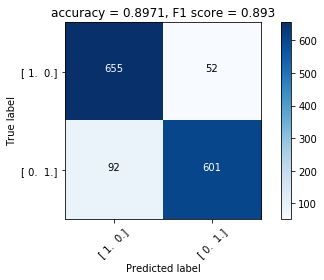

In [313]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label,title='accuracy = '+str(round(acc_synth,4))+
                                                ', F1 score = ' + str(round(f1_synth,4)))
plt.savefig(os.path.join(folderName, 'cnfSynth.png'), format='png', dpi=200)
plt.show()

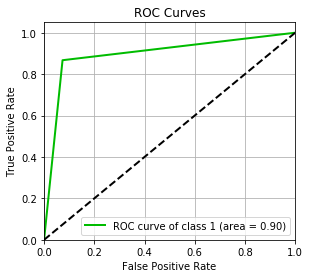

In [310]:
fig = plt.figure(figsize=(10,2),dpi=80)
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),predicted_esn,
                       classes_to_plot=[1],plot_micro=False,plot_macro =False,figsize=(4.5,4))
plt.grid()
plt.savefig(os.path.join(folderName, 'notempoSynth.png'), format='png', dpi=200)
plt.show()

<b> Использую метод темпорализации, в котором последовательность признаков является временной последовотельностью, т.е. значение каждого признака интерпретируется как отсчет в некоторый момент времени. При изменении порядка признаков в наборе данных (столбцы в InputData), опираясь на важность признаков, будет изменяться временной ряд.

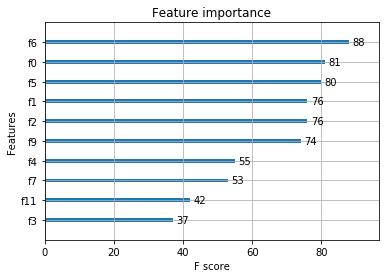

In [314]:
xgboost.plot_importance(model)
plt.savefig(os.path.join(folderName, 'importance.png'), format='png', dpi=200)

In [315]:
featlist

array([ 8, 10,  3, 11,  7,  4,  9,  1,  2,  5,  0,  6], dtype=int64)

<b> Меняем первые два признака по importance

In [52]:
changed1st2d=inputData.copy()
changed1st2d[:,featlist[-1]],changed1st2d[:,featlist[-2]]=changed1st2d[:,featlist[-2]],changed1st2d[:,featlist[-1]].copy()

In [53]:
cls.fit(changed1st2d[:n_train],outputData[:n_train])

0.71831763068905441

In [54]:
pred_1st2d=cls.predict(changed1st2d[n_train:])
cnf_1st2d=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1st2d,axis=1))
cnf_1st2d

array([[697, 103],
       [131, 669]], dtype=int64)

In [55]:
acc_1st2nd=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1st2d,axis=1))
print(acc_1st2nd)

0.85375


In [56]:
f1_1st2nd=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1st2d,axis=1))
print(f1_1st2nd)

0.851145038168


Confusion matrix, without normalization  1366


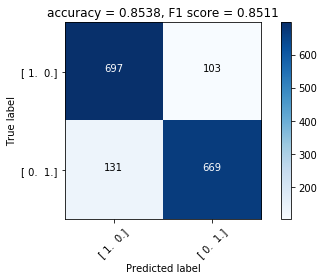

In [57]:
plt.figure()
plot_confusion_matrix(cnf_1st2d, classes=label,title='accuracy = '+str(round(acc_1st2nd,4))+
                                                ', F1 score = ' + str(round(f1_1st2nd,4)))
plt.savefig(os.path.join(folderName, '1st2ndcnfSynth.png'), format='png', dpi=200)
plt.show()

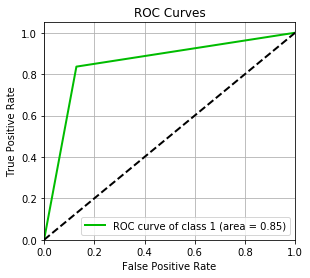

In [58]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_1st2d,classes_to_plot=[1],
                       plot_micro=False,plot_macro =False,figsize=(4.5,4))
plt.grid()
plt.savefig(os.path.join(folderName, '1st2ndSynth.png'), format='png', dpi=200)
plt.show() 

####  Меняем первый признак с последним по importance 

In [59]:
changed1stEnd=inputData.copy()
changed1stEnd[:,featlist[0]],changed1stEnd[:,featlist[-1]]=changed1stEnd[:,featlist[-1]],changed1stEnd[:,featlist[0]].copy()

In [60]:
cls.fit(changed1stEnd[:n_train],outputData[:n_train])

0.74711143212854292

In [61]:
pred_1stEnd=cls.predict(changed1stEnd[n_train:])
cnf_1stEnd=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1stEnd,axis=1))
cnf_1stEnd

array([[693, 107],
       [116, 684]], dtype=int64)

In [62]:
acc_1stEnd=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1stEnd,axis=1))
print(acc_1stEnd)

0.860625


In [63]:
f1_1stEnd=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1st2d,axis=1))
print(f1_1st2nd)

0.851145038168


Confusion matrix, without normalization  1377


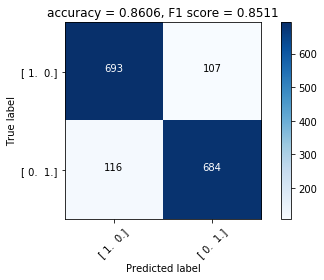

In [64]:
plt.figure()
plot_confusion_matrix(cnf_1stEnd, classes=label,title='accuracy = '+str(round(acc_1stEnd,4))+
                                                ', F1 score = ' + str(round(f1_1stEnd,4)))
plt.savefig(os.path.join(folderName, '1stEndcnfSynth.png'), format='png', dpi=200)
plt.show()

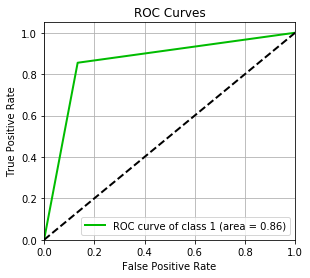

In [65]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_1stEnd,classes_to_plot=[1],
                       plot_micro=False,plot_macro =False,figsize=(4.5,4))
plt.grid()
plt.savefig(os.path.join(folderName, '1stEndSynth.png'), format='png', dpi=200)
plt.show() 

#### По порядку importance

In [66]:
copy=inputData.copy()
ordered=inputData.copy()
for i in range(inputData.shape[1]):
    ordered[:,i]=copy[:,featlist[i]]

In [67]:
cls.fit(ordered[:n_train],outputData[:n_train])

0.63650680962137707

In [68]:
pred_ord=cls.predict(ordered[n_train:])
cnf_ord=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_ord,axis=1))
cnf_ord

array([[690, 110],
       [196, 604]], dtype=int64)

In [69]:
acc_ord=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_ord,axis=1))
print(acc_ord)

0.80875


In [70]:
f1_ord=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_ord,axis=1))
print(f1_ord)

0.797886393659


Confusion matrix, without normalization  1294


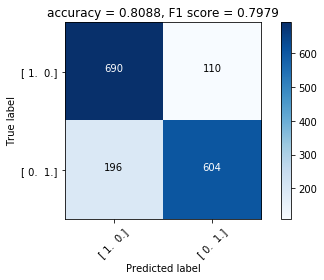

In [71]:
plt.figure()
plot_confusion_matrix(cnf_ord, classes=label,title='accuracy = '+str(round(acc_ord,4))+
                                                ', F1 score = ' + str(round(f1_ord,4)))
plt.savefig(os.path.join(folderName, 'ordcnfSynth.png'), format='png', dpi=200)
plt.show()

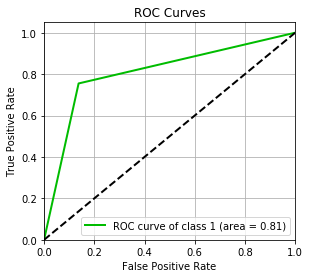

In [72]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_ord,classes_to_plot=[1],
                       plot_micro=False,plot_macro=False,figsize=(4.5,4))
plt.grid()
plt.savefig(os.path.join(folderName, 'ordSynth.png'), format='png', dpi=200)
plt.show() 

#### В обратном порядке importance

In [73]:
copy=inputData.copy()
reverse=inputData.copy()
for i in range(inputData.shape[1]):
    reverse[:,i]=copy[:,featlist[inputData.shape[1]-i-1]]

In [74]:
cls.fit(reverse[:n_train],outputData[:n_train])

0.68208216173132807

In [75]:
pred_rev=cls.predict(reverse[n_train:])
cnf_rev=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
cnf_rev

array([[710,  90],
       [ 97, 703]], dtype=int64)

In [76]:
acc_rev=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
print(acc_rev)

0.883125


In [77]:
f1_rev=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
print(f1_rev)

0.882611424984


Confusion matrix, without normalization  1413


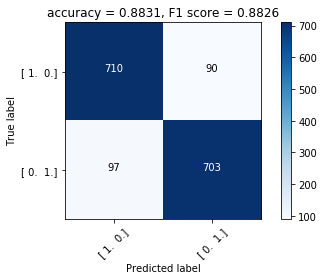

In [78]:
plt.figure()
plot_confusion_matrix(cnf_rev, classes=label,title='accuracy = '+str(round(acc_rev,4))+
                                                ', F1 score = ' + str(round(f1_rev,4)))
plt.savefig(os.path.join(folderName, 'nonordcnfSynth.png'), format='png', dpi=200)
plt.show()

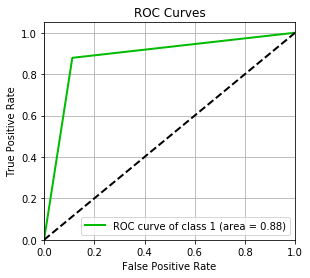

In [79]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_rev,classes_to_plot=[1],
                       plot_micro=False,plot_macro =False, figsize=(4.5,4))
plt.grid()
plt.savefig(os.path.join(folderName, 'nonordSynth.png'), format='png', dpi=200)
plt.show() 

#### Перемешиваем все столбцы  

In [80]:
shuffled=inputData.copy()
shuffled=shuffled[:, np.random.permutation(shuffled.shape[1])]

In [81]:
cls.fit(shuffled[:n_train],outputData[:n_train])

0.75584238894346545

In [82]:
pred_shuffl=cls.predict(shuffled[n_train:])
cnf_shuff=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_shuffl,axis=1))
cnf_shuff

array([[664, 136],
       [154, 646]], dtype=int64)

In [83]:
acc_shuff=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_shuffl,axis=1))
print(acc_shuff)

0.81875


In [84]:
f1_shuff=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_shuffl,axis=1))
print(f1_shuff)

0.816687737042


Confusion matrix, without normalization  1310


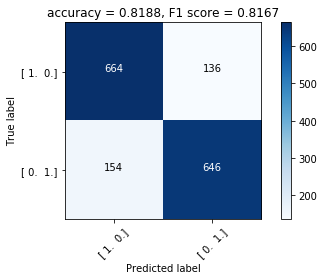

In [85]:
plt.figure()
plot_confusion_matrix(cnf_shuff, classes=label,title='accuracy = '+str(round(acc_shuff,4))+
                                                ', F1 score = ' + str(round(f1_shuff,4)))
plt.savefig(os.path.join(folderName, 'shuffcnfSynth.png'), format='png', dpi=200)
plt.show()

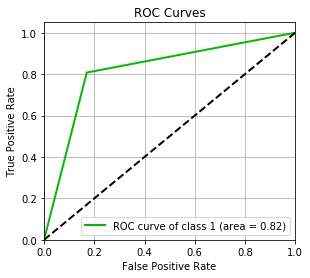

In [87]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_shuffl,classes_to_plot=[1],
                       plot_micro=False,plot_macro =False,figsize=(4.5,4))
plt.savefig(os.path.join(folderName, 'shuffSynth.png'), format='png', dpi=200)
plt.grid()
plt.show() 

## III [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci) dataset from Kaggle.com

### Heart Disease UCI
feature list:
- age:  in years <br/>
- sex: (1 = male; 0 = female) <br/>
- cp: chest pain type<br/>
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)<br/>
- chol: serum cholestoral in mg/dl<br/>
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br/>
- restecg: resting electrocardiographic results<br/>
- thalach: maximum heart rate achieved<br/>
- exang: exercise induced angina (1 = yes; 0 = no)<br/>
- oldpeak: ST depression induced by exercise relative to rest<br/>
- slope: the slope of the peak exercise ST segment<br/>
- ca: number of major vessels (0-3) colored by flourosopy<br/>
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br/>
- target: 1 or 0<br/>

In [14]:
file = 'heart.csv'
# Load spreadsheet
data=DataFrame(pd.read_csv(file) )
data=data.sample(frac=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0


In [318]:
data.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [319]:
_input=DataFrame(data.loc[:,data.columns[:-1]],columns=data.columns)
_output=data.loc[:,data.columns[-1]]

In [320]:
ohe=OneHotEncoder()
inputData=np.array(data.loc[:,data.columns[:-1]])
outputData=ohe.fit_transform(np.array(_output))

In [321]:
n_train=round(0.65*inputData.shape[0])

<b> бинарный классификатор на xgboost

In [322]:
model = xgboost.XGBClassifier()
model.fit(_input[:n_train],_output[:n_train])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

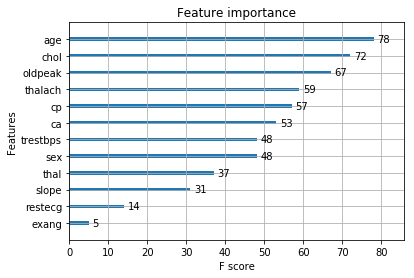

In [323]:
xgboost.plot_importance(model)
plt.savefig(os.path.join(folderName, 'importance_real.png'), format='png', dpi=200)

In [324]:
model.importance_type="weight"
featlist=model.feature_importances_.argsort()
featlist=featlist[1:]
featlist

array([13,  8,  6, 10, 12,  1,  3, 11,  2,  7,  9,  4,  0], dtype=int64)

In [325]:
pred_xgb = model.predict(_input[n_train:])

In [326]:
acc_xg_real=accuracy_score(pred_xgb,_output[n_train:])
f1_xg_real=f1_score(pred_xgb,_output[n_train:])

Confusion matrix, without normalization  82


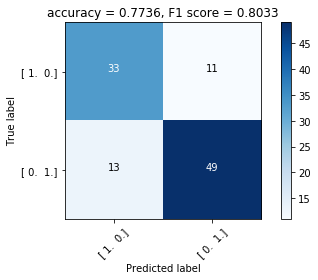

In [327]:
cnf_xg_real=confusion_matrix(_output[n_train:],pred_xgb)
plt.figure()
plot_confusion_matrix(cnf_xg_real, classes=label,title='accuracy = '+str(round(acc_xg_real,4))+
                                                ', F1 score = ' + str(round(f1_xg_real,4)))
plt.savefig(os.path.join(folderName, 'xgcnfReal.png'), format='png', dpi=200)
plt.show()

<b>бинарный классификатор на ESN

In [328]:
cls=ClassificationESN(1,400, 2)

In [329]:
cls.fit(inputData[:n_train],outputData[:n_train])

0.74672192413227534

In [330]:
pred_esn=cls.predict(inputData[n_train:])
cnf_real=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_esn,axis=1))

In [331]:
acc_real=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_esn,axis=1))
print(acc_real)

0.77358490566


In [332]:
f1_real=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_esn,axis=1))
print(f1_real)

0.820895522388


In [136]:
_parametersDictionary={'leakingRate':np.linspace(0.5,0.7,17),
                       'reservoirDensity':np.linspace(0.15,0.3,6)
                      }
_fixedParametersDictionary={'n_input':1, 'n_reservoir':400, 'n_classes':2}

In [0]:
opt=GridSearchOptimizer(ClassificationESN, parametersDictionary=_parametersDictionary,
                        fixedParametersDictionary=_fixedParametersDictionary)

In [60]:
opt.fit(inputData[:n_train],outputData[:n_train],inputData[n_train:],outputData[n_train:],transientTime=0)

100% (102 of 102) |#######| Elapsed Time: 0:02:06 Time:  0:02:06 Loss:	2.08E-01


[(0.24528301886792453,
  0.853553845628859,
  {'leakingRate': 0.5, 'reservoirDensity': 0.15}),
 (0.2358490566037736,
  0.849653468619912,
  {'leakingRate': 0.5, 'reservoirDensity': 0.18}),
 (0.25471698113207547,
  0.8555935004947973,
  {'leakingRate': 0.5, 'reservoirDensity': 0.21}),
 (0.25471698113207547,
  0.8199025838725904,
  {'leakingRate': 0.5, 'reservoirDensity': 0.24}),
 (0.2358490566037736,
  0.8958664474010407,
  {'leakingRate': 0.5, 'reservoirDensity': 0.27}),
 (0.24528301886792453,
  0.8546716136794942,
  {'leakingRate': 0.5, 'reservoirDensity': 0.3}),
 (0.25471698113207547,
  0.8558172209358296,
  {'leakingRate': 0.5125, 'reservoirDensity': 0.15}),
 (0.24528301886792453,
  0.8502112581470472,
  {'leakingRate': 0.5125, 'reservoirDensity': 0.18}),
 (0.22641509433962265,
  0.8111980472203464,
  {'leakingRate': 0.5125, 'reservoirDensity': 0.21}),
 (0.2830188679245283,
  0.8735955906273625,
  {'leakingRate': 0.5125, 'reservoirDensity': 0.24}),
 (0.2358490566037736,
  0.86257672

In [ ]:
best_arg=opt._best_params
best_arg

<b>optimized {'leakingRate': 0.55, 'reservoirDensity': 0.24}

In [334]:
cls=ClassificationESN(1,400, 2,leakingRate=0.55, reservoirDensity=0.24)

In [335]:
cls.fit(inputData[:n_train],outputData[:n_train])

0.753596423125517

In [336]:
pred_esn=cls.predict(inputData[n_train:])
cnf_real=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_esn,axis=1))

In [337]:
acc_real=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_esn,axis=1))
print(acc_real)

0.77358490566


In [338]:
f1_real=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_esn,axis=1))
print(f1_real)

0.803278688525


Confusion matrix, without normalization  82


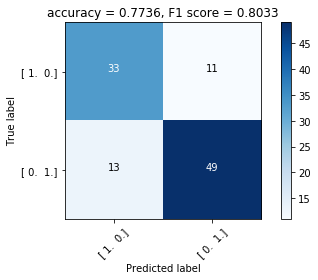

In [339]:
plt.figure()
plot_confusion_matrix(cnf_real, classes=label,title='accuracy = '+str(round(acc_real,4))+
                                                ', F1 score = ' + str(round(f1_real,4)))
plt.savefig(os.path.join(folderName, 'cnfReal.png'), format='png', dpi=200)
plt.show()

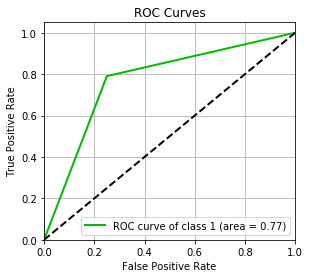

In [340]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_esn,classes_to_plot=[1],
                       plot_micro=False,plot_macro =False, figsize=(4.5,4))
plt.grid()
plt.savefig(os.path.join(folderName, 'notempoReal.png'), format='png', dpi=200)
plt.show() 

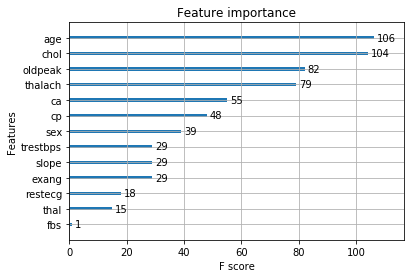

In [145]:
xgboost.plot_importance(model)

<b> Меняем первые два признака по importance

In [341]:
changed1st2d=inputData.copy()
changed1st2d[:,featlist[-2]],changed1st2d[:,featlist[-1]]=changed1st2d[:,featlist[-1]],changed1st2d[:,featlist[-2]].copy()

In [342]:
cls.fit(changed1st2d[:n_train],outputData[:n_train])

0.63620703939432566

In [343]:
pred_1st2d=cls.predict(changed1st2d[n_train:])
cnf_1st2d=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1st2d,axis=1))
cnf_1st2d

array([[30, 14],
       [14, 48]], dtype=int64)

In [344]:
acc_1st2nd=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1st2d,axis=1))
print(acc_1st2nd)

0.735849056604


In [345]:
f1_1st2nd=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1st2d,axis=1))
print(f1_1st2nd)

0.774193548387


Confusion matrix, without normalization  78


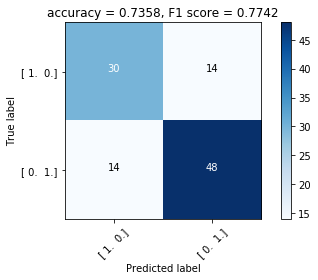

In [346]:
plt.figure()
plot_confusion_matrix(cnf_1st2d, classes=label,title='accuracy = '+str(round(acc_1st2nd,4))+
                                                ', F1 score = ' + str(round(f1_1st2nd,4)))
plt.savefig(os.path.join(folderName, '1st2ndcnfReal.png'), format='png', dpi=200)
plt.show()

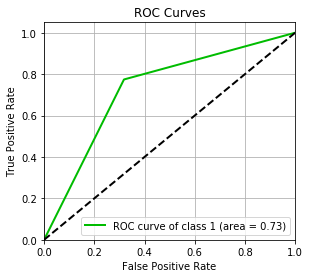

In [347]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_1st2d,classes_to_plot=[1],
                       plot_micro=False,plot_macro =False,figsize=(4.5,4))
plt.grid()
plt.savefig(os.path.join(folderName, '1st2ndReal.png'), format='png', dpi=200)
plt.show() 

<b> Меняем первый признак с последним по importance

In [348]:
changed1stEnd=inputData.copy()
changed1stEnd[:,featlist[0]-1],changed1stEnd[:,featlist[-1]]=changed1stEnd[:,featlist[-1]],changed1stEnd[:,featlist[0]-1].copy()

In [349]:
cls.fit(changed1stEnd[:n_train],outputData[:n_train])

1.3131190134034292

In [350]:
pred_1stEnd=cls.predict(changed1stEnd[n_train:])
cnf_1stEnd=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1stEnd,axis=1))
cnf_1stEnd

array([[25, 19],
       [16, 46]], dtype=int64)

In [351]:
acc_1stEnd=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1stEnd,axis=1))
print(acc_1stEnd)

0.669811320755


In [354]:
f1_1stEnd=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_1stEnd,axis=1))
print(f1_1stEnd)

0.724409448819


Confusion matrix, without normalization  71


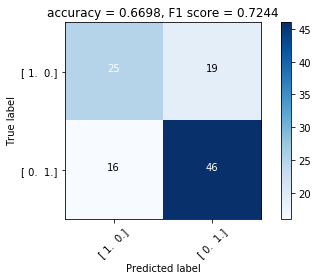

In [355]:
plt.figure()
plot_confusion_matrix(cnf_1stEnd, classes=label,title='accuracy = '+str(round(acc_1stEnd,4))+
                                                ', F1 score = ' + str(round(f1_1stEnd,4)))
plt.savefig(os.path.join(folderName, '1stEndcnfReal.png'), format='png', dpi=200)
plt.show()

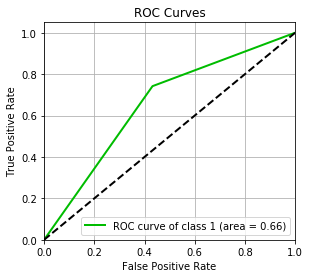

In [356]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_1stEnd,classes_to_plot=[1],
                       plot_micro=False,plot_macro =False,figsize=(4.5,4))
plt.grid()
plt.savefig(os.path.join(folderName, '1stEndReal.png'), format='png', dpi=200)
plt.show() 

####  По порядку importance

In [357]:
copy=inputData.copy()
ordered=inputData.copy()
for i in range(inputData.shape[1]):
    ordered[:,i]=copy[:,featlist[i]-1]

In [358]:
cls.fit(ordered[:n_train],outputData[:n_train])

1.3364978447052462

In [359]:
pred_ord=cls.predict(ordered[n_train:])
cnf_ord=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_ord,axis=1))
cnf_ord

array([[31, 13],
       [11, 51]], dtype=int64)

In [360]:
acc_ord=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_ord,axis=1))
print(acc_ord)

0.77358490566


In [363]:
f1_ord=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_ord,axis=1))
print(f1_ord)

0.809523809524


Confusion matrix, without normalization  82


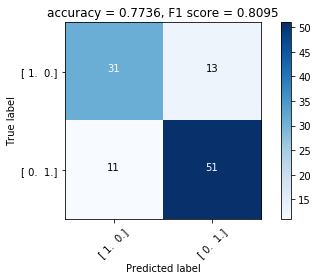

In [364]:
plt.figure()
plot_confusion_matrix(cnf_ord, classes=label,title='accuracy = '+str(round(acc_ord,4))+
                                                ', F1 score = ' + str(round(f1_ord,4)))
plt.savefig(os.path.join(folderName, 'ordcnfReal.png'), format='png', dpi=200)
plt.show()

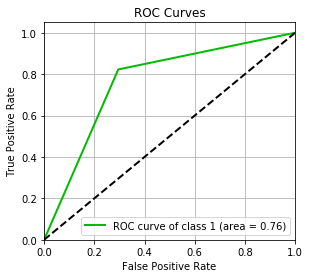

In [365]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_ord,classes_to_plot=[1],
                       plot_micro=False,plot_macro =False,figsize=(4.5,4))
plt.grid()
plt.savefig(os.path.join(folderName, 'ordReal.png'), format='png', dpi=200)
plt.show() 

#### В обратном порядке importance

In [366]:
copy=inputData.copy()
reverse=inputData.copy()
for i in range(inputData.shape[1]):
    reverse[:,i]=copy[:,featlist[inputData.shape[1]-i-1]-1]

In [367]:
cls.fit(reverse[:n_train],outputData[:n_train])

1.429464831896637

In [368]:
pred_rev=cls.predict(reverse[n_train:])
cnf_rev=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
cnf_rev

array([[31, 13],
       [13, 49]], dtype=int64)

In [369]:
acc_rev=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
print(acc_rev)

0.754716981132


In [373]:
f1_rev=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
print(f1_rev)

0.790322580645


Confusion matrix, without normalization  80


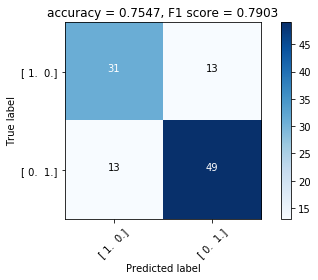

In [374]:
plt.figure()
plot_confusion_matrix(cnf_rev, classes=label,title='accuracy = '+str(round(acc_rev,4))+
                                                ', F1 score = ' + str(round(f1_rev,4)))
plt.savefig(os.path.join(folderName, 'nonordcnfReal.png'), format='png', dpi=200)
plt.show()

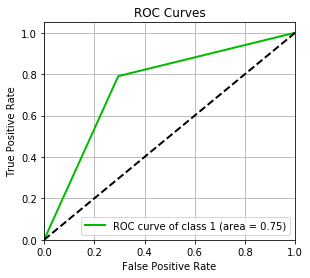

In [375]:
fpr, tpr, thresholds =roc_curve(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_rev,axis=1))
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_rev,classes_to_plot=[1],
                       plot_micro=False,plot_macro =False,figsize=(4.5,4))
plt.grid()
plt.savefig(os.path.join(folderName, 'nonordReal.png'), format='png', dpi=200)
plt.show() 

#### Перемешиваем все столбцы 

In [376]:
shuffled=inputData.copy()
shuffled=shuffled[:, np.random.permutation(shuffled.shape[1])]

In [377]:
cls.fit(shuffled[:n_train],outputData[:n_train])

0.88040398168745782

In [378]:
pred_shuffl=cls.predict(shuffled[n_train:])
cnf_shuff=confusion_matrix(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_shuffl,axis=1))
cnf_shuff

array([[33, 11],
       [14, 48]], dtype=int64)

In [382]:
acc_shuff=accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_shuffl,axis=1))
print(acc_shuff)

0.764150943396


In [384]:
f1_shuff=f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(pred_shuffl,axis=1))
print(f1_shuff)

0.793388429752


Confusion matrix, without normalization  81


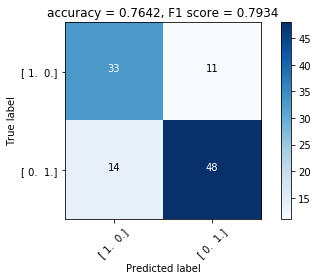

In [385]:
plt.figure()
plot_confusion_matrix(cnf_shuff, classes=label,title='accuracy = '+str(round(acc_shuff,4))+
                                                ', F1 score = ' + str(round(f1_shuff,4)))
plt.savefig(os.path.join(folderName, 'shuffcnfReal.png'), format='png', dpi=200)
plt.show()

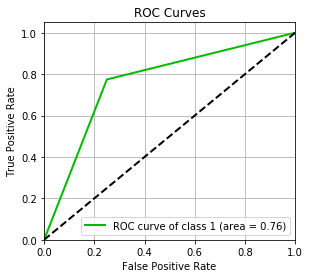

In [386]:
skplt.metrics.plot_roc(np.argmax(outputData[n_train:],axis=1),pred_shuffl,classes_to_plot=[1],
                       plot_micro=False,plot_macro =False,figsize=(4.5,4))
plt.grid()
plt.savefig(os.path.join(folderName, 'shuffReal.png'), format='png', dpi=200)
plt.show() 

## проверка гипотез о независимости результатов бинарного классификатора ClassificationESN от темпорализации набора данных

In [31]:
data=data.sample(frac=1)

In [32]:
DataFrame(data).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1


<b> генерирование выборок для проверки равенства средних accuracy и F1 score для набора данных с признаками , отсортированными по imoprtance и расставленными в случайном порядке

In [44]:
def test(_data,n_iter):
    accuracy_imp_ord=[]
    f1_imp_ord=[]
    accuracy_shuff=[]
    f1_shuff=[]
    bar = progressbar.ProgressBar().start()
    for i in range(n_iter):
        bar.update(i)
        data=_data
        data=data.sample(frac=1)

        _input=DataFrame(data.loc[:,data.columns[:-1]],columns=data.columns)
        _output=data.loc[:,data.columns[-1]]


        ohe=OneHotEncoder()
        inputData=np.array(data.loc[:,data.columns[:-1]])
        outputData=ohe.fit_transform(np.array(_output))
        n_train=round(0.65*inputData.shape[0])
        
        #узнаем feature_importance
        model = xgboost.XGBClassifier()
        model.fit(_input[:n_train],_output[:n_train])
        model.importance_type="weight"
        featlist=model.feature_importances_.argsort()
        featlist=featlist[1:]

        cls=ClassificationESN(1,400, 2,leakingRate=0.55, reservoirDensity=0.24)

        # в порядке importance
        copy=inputData.copy()
        ordered=inputData.copy()
        for j in range(inputData.shape[1]):
            ordered[:,j]=copy[:,featlist[j]-1]
        cls.fit(ordered[:n_train],outputData[:n_train])
        y_predOrd=cls.predict(ordered[n_train:])
        #accuracy
        accuracy_imp_ord.append(accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(y_predOrd,axis=1)))
        #f1_score
        f1_imp_ord.append(f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(y_predOrd,axis=1)))
        
        # в случайном поярдке
        shuffled=inputData.copy()
        shuffled=shuffled[:, np.random.permutation(shuffled.shape[1])]
        cls.fit(shuffled[:n_train],outputData[:n_train])
        y_predShuff=cls.predict(shuffled[n_train:])
        #accuracy
        accuracy_shuff.append(accuracy_score(np.argmax(outputData[n_train:],axis=1),np.argmax(y_predShuff,axis=1)))
        #f1_score
        f1_shuff.append(f1_score(np.argmax(outputData[n_train:],axis=1),np.argmax(y_predShuff,axis=1)))
    bar.finish()    
    return accuracy_imp_ord,f1_imp_ord, accuracy_shuff, f1_shuff

In [46]:
def plt_distrub(test_sample,i,color):
    n=20#len(test_sample[i])
    s = pd.Series(test_sample[i])
    s.plot.kde()
    plt.plot([np.mean(test_sample[i]),np.mean(test_sample[i])],[0,n],color)
    plt.plot([np.mean(test_sample[i])+np.std(test_sample[i]),np.mean(test_sample[i])+np.std(test_sample[i])],
               [0,n],'--'+color)
    plt.plot([np.mean(test_sample[i])-np.std(test_sample[i]),np.mean(test_sample[i])-np.std(test_sample[i])],
               [0,n],'--'+color)
    plt.grid()
    return s

In [47]:
test_sample20=test(data,20)

100% |########################################################################|


In [80]:
test_sample40=test(data,40)

100% |########################################################################|


In [81]:
test_sample80=test(data,80)

100% |########################################################################|


In [82]:
# test_sample100=test(data,100)

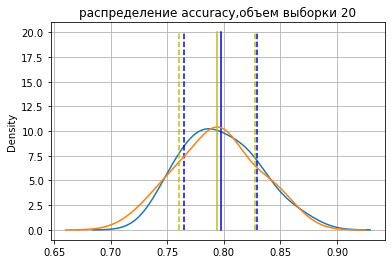

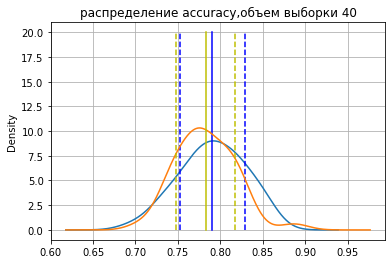

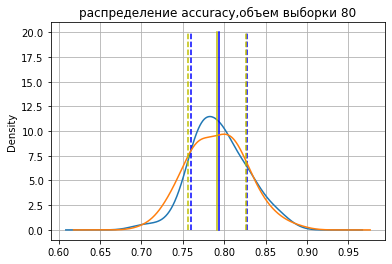

In [96]:
l=plt_distrub(test_sample20,0,'b')
plt_distrub(test_sample20,2,'y')
plt.title('распределение accuracy,объем выборки 20')
plt.show()
plt_distrub(test_sample40,0,'b')
plt_distrub(test_sample40,2,'y')
plt.title('распределение accuracy,объем выборки 40')
plt.show()
plt_distrub(test_sample80,0,'b')
plt_distrub(test_sample80,2,'y')
plt.title('распределение accuracy,объем выборки 80')
plt.show()

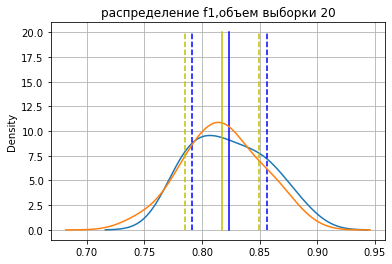

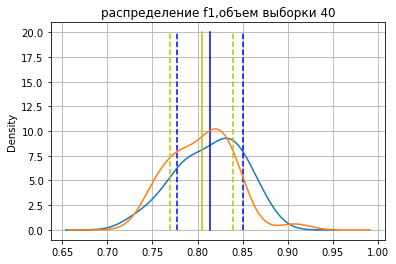

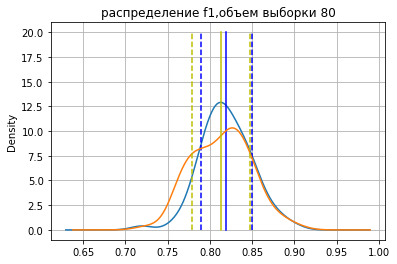

In [97]:
l=plt_distrub(test_sample20,1,'b')
plt_distrub(test_sample20,3,'y')
plt.title('распределение f1,объем выборки 20')
plt.show()
plt_distrub(test_sample40,1,'b')
plt_distrub(test_sample40,3,'y')
plt.title('распределение f1,объем выборки 40')
plt.show()
plt_distrub(test_sample80,1,'b')
plt_distrub(test_sample80,3,'y')
plt.title('распределение f1,объем выборки 80')
plt.show()

In [85]:
import scipy.stats as stats
from scipy.stats import norm,pearsonr

 Проверка критерия согласия с нормальным распределением

In [86]:
norm_sample=norm.pdf(test_sample80[0], np.mean(test_sample80[0]), np.std(test_sample80[0]))

In [87]:
pearsonr(norm_sample,test_sample80[0])

(-0.14422331774220443, 0.20183004214489789)

In [88]:
norm_sample=norm.pdf(test_sample80[1], np.mean(test_sample80[1]), np.std(test_sample80[1]))

In [89]:
pearsonr(norm_sample,test_sample80[1])

(-0.083412780083145274, 0.46196933545279206)

In [90]:
norm_sample=norm.pdf(test_sample80[2], np.mean(test_sample80[2]), np.std(test_sample80[2]))

In [91]:
pearsonr(norm_sample,test_sample80[2])

(-0.03823761787788648, 0.73630676551456897)

In [92]:
norm_sample=norm.pdf(test_sample80[3], np.mean(test_sample80[3]), np.std(test_sample80[3]))

In [93]:
pearsonr(norm_sample,test_sample80[3])

(0.025126416349521816, 0.82490917059520075)

# Проверим гипотезу о равенстве средних у accuracy в порядке importance и случайно перемешанных features,  используя t-критерий Стьюдента

<b> объем выборки =80
  

In [94]:
print('t-test for accuracy')
stats.ttest_ind(test_sample80[0], test_sample80[2])

t-test for accuracy


Ttest_indResult(statistic=0.51313935747044415, pvalue=0.60857057745064824)

In [95]:
print('t-test for f1 score')
stats.ttest_ind(test_sample80[1], test_sample80[3])

t-test for f1 score


Ttest_indResult(statistic=1.1401724564140232, pvalue=0.25593988140050478)